# Creation of recovered data (estimated)

In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np
from IPython import display

## 1. Creation of the array with the recovered values in time

In [2]:
# Reading deaths raw file as dictionary
df = pd.read_excel('SouthKorea_OWID_Confirmed_Deaths.xlsx')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
0,KOR,Asia,South Korea,2020-01-22,1,1,0,0
1,KOR,Asia,South Korea,2020-01-23,1,0,0,0
2,KOR,Asia,South Korea,2020-01-24,2,1,0,0
3,KOR,Asia,South Korea,2020-01-25,2,0,0,0
4,KOR,Asia,South Korea,2020-01-26,3,1,0,0


In [3]:
# Obtaining the deaths values since the beginning
T_deaths_original = df.values[:,6]

T_deaths_original[0:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 6, 8, 10, 12, 13, 13, 16, 17, 28, 28,
       35, 35, 42, 44, 50, 53, 54, 60], dtype=object)

In [4]:
# Creation of New Deaths (Death[t] - Death[t-1])

N_deaths = np.empty(len(T_deaths_original), dtype = object)
N_deaths[0] = 0  # First value is 0
for i in range(1, len(N_deaths)):
    result = T_deaths_original[i] - T_deaths_original[i-1]
    if result >= 0:
        N_deaths[i] = result
    else:
        N_deaths[i] = 0

N_deaths.shape, N_deaths

((793,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 4, 2, 2, 2, 1, 0, 3, 1, 11, 0, 7, 0,
        7, 2, 6, 3, 1, 6, 6, 0, 6, 3, 0, 6, 3, 7, 3, 8, 9, 0, 9, 6, 5, 8,
        5, 8, 6, 4, 3, 4, 5, 3, 6, 3, 6, 8, 4, 4, 3, 3, 3, 5, 3, 4, 1, 2,
        2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 0,
        2, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2,
        2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 2, 1, 3, 5,
        2, 1, 0, 2, 3, 2, 2, 1, 2, 5, 3, 2, 4, 5, 3, 5, 4, 0, 5, 5, 1, 5,
        2, 3, 0, 5, 2, 4, 2, 5, 1, 6, 2, 1, 4, 1, 1, 0, 3, 2, 1, 2, 2, 1,
        1, 4, 1, 2, 2, 1, 0, 3, 3, 3, 2, 2, 0, 0, 3, 1, 1, 1, 1, 2, 2, 4,
        2, 1, 1, 1, 1, 2, 5,

In [5]:
# Creation of Fixed Total Deaths (Accumulative sum of N_deaths array)
T_deaths_fix = np.empty(len(T_deaths_original), dtype = object)
T_deaths_fix[0] = 0

sum_T = 0
for i in range(1, len(T_deaths_original)):
    sum_T = sum_T + N_deaths[i]
    T_deaths_fix[i] = sum_T

T_deaths_fix.shape, T_deaths_fix

((793,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 6, 8, 10, 12, 13, 13, 16, 17, 28, 28,
        35, 35, 42, 44, 50, 53, 54, 60, 66, 66, 72, 75, 75, 81, 84, 91, 94,
        102, 111, 111, 120, 126, 131, 139, 144, 152, 158, 162, 165, 169,
        174, 177, 183, 186, 192, 200, 204, 208, 211, 214, 217, 222, 225,
        229, 230, 232, 234, 236, 237, 238, 240, 240, 242, 243, 244, 246,
        247, 248, 250, 250, 252, 254, 255, 256, 256, 256, 256, 256, 258,
        259, 260, 260, 262, 262, 263, 263, 263, 264, 264, 266, 266, 267,
        269, 269, 269, 269, 269, 270, 271, 272, 273, 273, 273, 273, 273,
        273, 274, 276, 276, 277, 277, 277, 277, 278, 279, 280, 280, 280,
        280, 280, 281, 281, 282, 282, 282, 282, 282, 282, 282, 282, 282,
        283, 283, 284, 285, 285, 287, 288, 288, 289, 289, 289, 289, 291,
        293, 294, 295, 296, 296, 297, 297, 298, 298, 298, 299, 300, 300,
        300, 301, 301, 301, 301, 30

In [6]:
# Reading confirmed raw file as dictionary
df = pd.read_excel('SouthKorea_OWID_Confirmed_Deaths.xlsx')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
0,KOR,Asia,South Korea,2020-01-22,1,1,0,0
1,KOR,Asia,South Korea,2020-01-23,1,0,0,0
2,KOR,Asia,South Korea,2020-01-24,2,1,0,0
3,KOR,Asia,South Korea,2020-01-25,2,0,0,0
4,KOR,Asia,South Korea,2020-01-26,3,1,0,0


In [7]:
# Obtaining the confirmed values since the beginning
T_cases_original = df.values[:,4]
N_cases_original = df.values[:,5]

T_cases_original[0:20], N_cases_original[0:20]

(array([1, 1, 2, 2, 3, 4, 4, 4, 4, 11, 12, 15, 15, 16, 19, 23, 24, 24, 25,
        27], dtype=object),
 array([1, 0, 1, 0, 1, 1, 0, 0, 0, 7, 1, 3, 0, 1, 3, 4, 1, 0, 1, 2],
       dtype=object))

In [8]:
# Creation of New Confirmed (Confirmed[t] - Confirmed[t-1])

N_confirmed = np.empty(len(T_cases_original), dtype = object)
N_confirmed[0] = 0  # First value is 0
for i in range(1, len(N_confirmed)):
    result = T_cases_original[i] - T_cases_original[i-1]
    if result >= 0:
        N_confirmed[i] = result
    else:
        N_confirmed[i] = 0

N_confirmed.shape, N_confirmed

((793,),
 array([0, 0, 1, 0, 1, 1, 0, 0, 0, 7, 1, 3, 0, 1, 3, 4, 1, 0, 1, 2, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 73, 100, 229, 169, 231, 144, 284, 505, 571,
        813, 586, 599, 851, 435, 467, 505, 448, 273, 164, 35, 242, 114,
        110, 107, 76, 74, 84, 93, 152, 87, 147, 162, 0, 76, 100, 104, 91,
        146, 105, 78, 125, 101, 89, 86, 94, 81, 47, 47, 53, 39, 27, 30, 32,
        25, 27, 27, 22, 22, 18, 8, 13, 9, 11, 14, 10, 10, 10, 14, 9, 4, 9,
        6, 13, 8, 3, 2, 4, 12, 18, 34, 35, 27, 26, 29, 27, 19, 13, 15, 13,
        32, 12, 20, 23, 25, 16, 19, 40, 79, 58, 39, 27, 35, 38, 49, 39, 39,
        51, 57, 38, 38, 50, 45, 56, 48, 34, 36, 34, 43, 59, 49, 67, 48, 17,
        46, 51, 28, 39, 51, 62, 42, 43, 50, 54, 63, 63, 61, 46, 44, 63, 49,
        45, 35, 44, 62, 33, 39, 61, 60, 39, 34, 26, 45, 63, 59, 41, 113,
        58, 25, 28, 48, 18, 36, 31, 30, 23, 34, 33, 43, 20, 43, 36, 28, 34,
        54, 56, 103, 166, 279, 197, 246, 297, 288, 324, 332, 397, 266, 280,
        320, 441, 3

In [9]:
# Creation of Fixed Total Confirmed (Accumulative sum of N_confirmed array)
T_confirmed_fix = np.empty(len(N_confirmed), dtype = object)
T_confirmed_fix[0] = 0

sum_T = 0
for i in range(1, len(N_confirmed)):
    sum_T = sum_T + N_confirmed[i]
    T_confirmed_fix[i] = sum_T

T_confirmed_fix.shape, T_confirmed_fix

((793,),
 array([0, 0, 1, 1, 2, 3, 3, 3, 3, 10, 11, 14, 14, 15, 18, 22, 23, 23, 24,
        26, 27, 27, 27, 27, 27, 28, 29, 30, 30, 103, 203, 432, 601, 832,
        976, 1260, 1765, 2336, 3149, 3735, 4334, 5185, 5620, 6087, 6592,
        7040, 7313, 7477, 7512, 7754, 7868, 7978, 8085, 8161, 8235, 8319,
        8412, 8564, 8651, 8798, 8960, 8960, 9036, 9136, 9240, 9331, 9477,
        9582, 9660, 9785, 9886, 9975, 10061, 10155, 10236, 10283, 10330,
        10383, 10422, 10449, 10479, 10511, 10536, 10563, 10590, 10612,
        10634, 10652, 10660, 10673, 10682, 10693, 10707, 10717, 10727,
        10737, 10751, 10760, 10764, 10773, 10779, 10792, 10800, 10803,
        10805, 10809, 10821, 10839, 10873, 10908, 10935, 10961, 10990,
        11017, 11036, 11049, 11064, 11077, 11109, 11121, 11141, 11164,
        11189, 11205, 11224, 11264, 11343, 11401, 11440, 11467, 11502,
        11540, 11589, 11628, 11667, 11718, 11775, 11813, 11851, 11901,
        11946, 12002, 12050, 12084, 12120, 12154, 12

In [10]:
# Creation of Fixed Total Alive Confirmed (Accumulative sum of N_confirmed array - Total Deaths)
T_confirmed_alive_fix = np.empty(len(T_confirmed_fix), dtype = object)

for i in range(0, len(T_confirmed_fix)):
    T_confirmed_alive_fix[i] = T_confirmed_fix[i] - T_deaths_fix[i]

T_confirmed_alive_fix.shape, T_confirmed_alive_fix

((793,),
 array([0, 0, 1, 1, 2, 3, 3, 3, 3, 10, 11, 14, 14, 15, 18, 22, 23, 23, 24,
        26, 27, 27, 27, 27, 27, 28, 29, 30, 30, 102, 201, 430, 595, 824,
        966, 1248, 1752, 2323, 3133, 3718, 4306, 5157, 5585, 6052, 6550,
        6996, 7263, 7424, 7458, 7694, 7802, 7912, 8013, 8086, 8160, 8238,
        8328, 8473, 8557, 8696, 8849, 8849, 8916, 9010, 9109, 9192, 9333,
        9430, 9502, 9623, 9721, 9806, 9887, 9978, 10053, 10097, 10138,
        10183, 10218, 10241, 10268, 10297, 10319, 10341, 10365, 10383,
        10404, 10420, 10426, 10437, 10445, 10455, 10467, 10477, 10485,
        10494, 10507, 10514, 10517, 10525, 10529, 10542, 10548, 10549,
        10550, 10553, 10565, 10583, 10617, 10652, 10677, 10702, 10730,
        10757, 10774, 10787, 10801, 10814, 10846, 10857, 10877, 10898,
        10923, 10938, 10955, 10995, 11074, 11132, 11171, 11197, 11231,
        11268, 11316, 11355, 11394, 11445, 11502, 11540, 11577, 11625,
        11670, 11725, 11773, 11807, 11843, 11876, 1191

In [11]:
# Estimation Recovered Accumulated

Ac_recovered = np.empty(len(T_confirmed_fix), dtype = object)

# First 10 values
for i in range(0, 14, 1):
    Ac_recovered[i] = 0

for i in range(14, len(T_confirmed_fix), 1):
    Ac_recovered[i] = T_confirmed_alive_fix[i-14]

# Ac_recovered.shape, Ac_recovered[0:20], Ac_recovered[-10:-1], Ac_recovered[-1]
Ac_recovered.shape, Ac_recovered[0:200], Ac_recovered[-10:-1], Ac_recovered[-1]

((793,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 3, 3,
        3, 10, 11, 14, 14, 15, 18, 22, 23, 23, 24, 26, 27, 27, 27, 27, 27,
        28, 29, 30, 30, 102, 201, 430, 595, 824, 966, 1248, 1752, 2323,
        3133, 3718, 4306, 5157, 5585, 6052, 6550, 6996, 7263, 7424, 7458,
        7694, 7802, 7912, 8013, 8086, 8160, 8238, 8328, 8473, 8557, 8696,
        8849, 8849, 8916, 9010, 9109, 9192, 9333, 9430, 9502, 9623, 9721,
        9806, 9887, 9978, 10053, 10097, 10138, 10183, 10218, 10241, 10268,
        10297, 10319, 10341, 10365, 10383, 10404, 10420, 10426, 10437,
        10445, 10455, 10467, 10477, 10485, 10494, 10507, 10514, 10517,
        10525, 10529, 10542, 10548, 10549, 10550, 10553, 10565, 10583,
        10617, 10652, 10677, 10702, 10730, 10757, 10774, 10787, 10801,
        10814, 10846, 10857, 10877, 10898, 10923, 10938, 10955, 10995,
        11074, 11132, 11171, 11197, 11231, 11268, 11316, 11355, 11394,
        11445, 11502, 11540, 11577, 11625, 1167

In [12]:
# Recovered Smooth Accumulated (11 days - 7 days average)

Ac_recovered_smooth = np.empty(len(Ac_recovered)-6, dtype = object)  # 6 first values are not available
for i in range(0, len(Ac_recovered)-6):
    sum_Ac = 0
    for j in range(i, i+7):
        sum_Ac = sum_Ac + Ac_recovered[j]
    Ac_recovered_smooth[i] = (sum_Ac/7)

Ac_recovered_smooth.shape, Ac_recovered_smooth

((787,),
 array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.14285714285714285, 0.2857142857142857, 0.5714285714285714, 1.0,
        1.4285714285714286, 1.8571428571428572, 2.2857142857142856,
        3.5714285714285716, 5.0, 6.714285714285714, 8.285714285714286,
        10.0, 12.142857142857142, 14.857142857142858, 16.714285714285715,
        18.428571428571427, 19.857142857142858, 21.571428571428573,
        23.285714285714285, 24.571428571428573, 25.285714285714285,
        25.857142857142858, 26.428571428571427, 27.0, 27.428571428571427,
        27.857142857142858, 28.285714285714285, 39.0, 63.857142857142854,
        121.42857142857143, 202.42857142857142, 316.0, 449.7142857142857,
        623.7142857142857, 859.4285714285714, 1162.5714285714287,
        1548.7142857142858, 1994.857142857143, 2492.285714285714, 3091.0,
        3710.5714285714284, 4324.857142857143, 4928.714285714285,
        5480.571428571428, 5987.0, 6432.428571428572, 6761.142857142857,
        7

## 2. Creation of the final dataset

In [13]:
# Reading confirmed file as dictionary, to extract some columns
df = pd.read_csv('Confirmed_KOR.csv')
df.head()

,ISO_code,Continent,Country/Region,Date,Total Confirmed,New Confirmed,New Confirmed Smooth (7 days),Total Confirmed Fixed (sum New Confirmed),Total Alive Confirmed Fixed (sum New Confirmed - Total Deaths),Accumulated Alive Confirmed in 14 days,Accumulated Alive Confirmed Smooth in 14 days
0,KOR,Asia,South Korea,2020-01-28,4,0,0.571429,4,4,4,2.428571
1,KOR,Asia,South Korea,2020-01-29,4,0,0.428571,4,4,4,2.857143
2,KOR,Asia,South Korea,2020-01-30,4,0,0.428571,4,4,4,3.285714
3,KOR,Asia,South Korea,2020-01-31,11,7,1.285714,11,11,11,4.571429
4,KOR,Asia,South Korea,2020-02-01,12,1,1.428571,12,12,12,6.000000


In [14]:
# Arrays which will form the final dataframe of Recovered
iso_code = df.values[:, 0]
continent = df.values[:, 1]
region = df.values[:, 2]
dates = df.values[:, 3]

iso_code[0:5], continent[0:5], region[0:5], dates[0:5]

(array(['KOR', 'KOR', 'KOR', 'KOR', 'KOR'], dtype=object),
 array(['Asia', 'Asia', 'Asia', 'Asia', 'Asia'], dtype=object),
 array(['South Korea', 'South Korea', 'South Korea', 'South Korea',
        'South Korea'], dtype=object),
 array(['2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
        '2020-02-01'], dtype=object))

In [15]:
# Array concatenation for building the final dataframe

columns = 6  # Number of columns
X_total = np.empty((len(Ac_recovered_smooth), columns), dtype = object)

for i in range(len(Ac_recovered_smooth)):
    X_total[i] = [iso_code[i], continent[i], region[i], dates[i],
                  Ac_recovered[i+6], Ac_recovered_smooth[i]]
    
X_total.shape, X_total[0:10]

((787, 6),
 array([['KOR', 'Asia', 'South Korea', '2020-01-28', 0, 0.0],
        ['KOR', 'Asia', 'South Korea', '2020-01-29', 0, 0.0],
        ['KOR', 'Asia', 'South Korea', '2020-01-30', 0, 0.0],
        ['KOR', 'Asia', 'South Korea', '2020-01-31', 0, 0.0],
        ['KOR', 'Asia', 'South Korea', '2020-02-01', 0, 0.0],
        ['KOR', 'Asia', 'South Korea', '2020-02-02', 0, 0.0],
        ['KOR', 'Asia', 'South Korea', '2020-02-03', 0, 0.0],
        ['KOR', 'Asia', 'South Korea', '2020-02-04', 0, 0.0],
        ['KOR', 'Asia', 'South Korea', '2020-02-05', 0, 0.0],
        ['KOR', 'Asia', 'South Korea', '2020-02-06', 0, 0.0]], dtype=object))

In [16]:
# Labels of each column of the dataframe
labels = ['ISO_code', 'Continent', 'Country/Region', 'Date',
          'Total Recovered', 'Total Recovered Smooth (7 days)']

In [17]:
# Creation of the final dataframe
df_recovered = pd.DataFrame(data=X_total, columns=labels)
df_recovered

,ISO_code,Continent,Country/Region,Date,Total Recovered,Total Recovered Smooth (7 days)
0,KOR,Asia,South Korea,2020-01-28,0,0.0
1,KOR,Asia,South Korea,2020-01-29,0,0.0
2,KOR,Asia,South Korea,2020-01-30,0,0.0
3,KOR,Asia,South Korea,2020-01-31,0,0.0
4,KOR,Asia,South Korea,2020-02-01,0,0.0
...,...,...,...,...,...,...
782,KOR,Asia,South Korea,2022-03-20,4657880,3955939.428571
783,KOR,Asia,South Korea,2022-03-21,4860408,4183815.142857
784,KOR,Asia,South Korea,2022-03-22,5202677,4429280.571429
785,KOR,Asia,South Korea,2022-03-23,5530003,4693124.857143


In [18]:
# Export dataframe to a csv file

from pathlib import Path  
filepath = Path('Recovered_KOR_EST.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_recovered.to_csv(filepath, index=False)

Text(0.5, 1.0, 'Recovered Estimated')

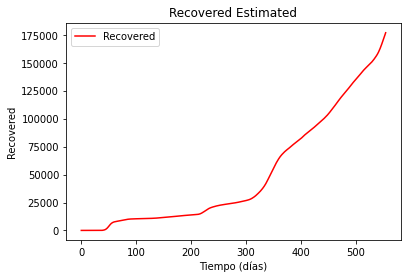

In [19]:
plt.plot(range(0, 555), Ac_recovered_smooth[0:555], 'r', label="Recovered")
plt.xlabel("Tiempo (días)")
plt.ylabel("Recovered")
plt.legend()

plt.title("Recovered Estimated")